# 📅 Day 1 Challenge
* **Theme:**  Sales/Superstore Dataset
* **Tools:**  Pandas, Matplotlib/Seaborn



##### Dataset Link: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Sample - Superstore.csv", encoding_errors = 'ignore')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Find the top 5 customers by total sales amount.

In [50]:
top_cust = df.groupby("Customer Name")['Sales'].sum().sort_values(ascending = False).reset_index()
top_cust = top_cust.head(5)
top_cust
top_cust_names = top_cust['Customer Name']
top_cust_names

0      Sean Miller
1     Tamara Chand
2     Raymond Buch
3     Tom Ashbrook
4    Adrian Barton
Name: Customer Name, dtype: object

## Create a bar plot showing the top 5 product categories by total profit.

In [71]:
profit_by_category = df.groupby('Category')['Profit'].sum()
profit_by_category

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

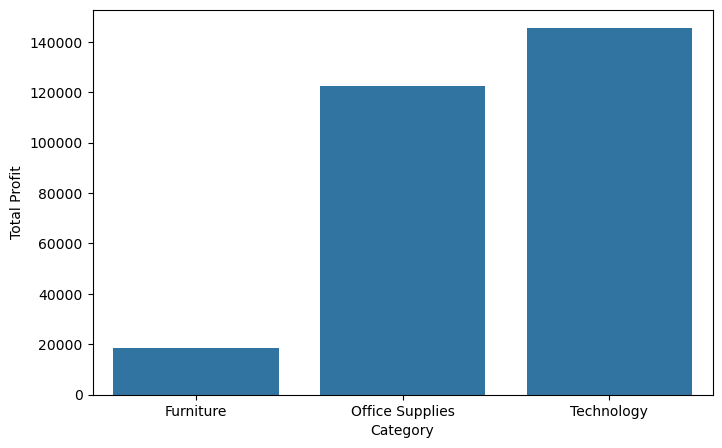

In [79]:
plt.figure(figsize = (8,5))
sns.barplot(x = profit_by_category.index, y = profit_by_category.values)
# plt.bar(profit_by_category.index, profit_by_category.values)
plt.ylabel("Total Profit")
plt.show()

## Task:

### Clean and analyze:

* Check for any missing values.

* Create a new column: High Profit (where Profit > 500 is Yes, else No).

* Find the percentage of high-profit orders.

In [94]:
missing_val = df.isna().sum()
missing_val

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [100]:
df['High Profit'] = df['Profit'].apply(lambda x: 'Yes' if x > 500 else 'No')
df[['Profit','High Profit']]

,Profit,High Profit
0,41.9136,No
1,219.5820,No
2,6.8714,No
3,-383.0310,No
4,2.5164,No
...,...,...
9989,4.1028,No
9990,15.6332,No
9991,19.3932,No
9992,13.3200,No


In [106]:
# Using numpy:
df['Highh Profit'] = np.where(df['Profit'] > 500, 'Yes', 'No')
df[['Profit', 'Highh Profit']]

,Profit,Highh Profit
0,41.9136,No
1,219.5820,No
2,6.8714,No
3,-383.0310,No
4,2.5164,No
...,...,...
9989,4.1028,No
9990,15.6332,No
9991,19.3932,No
9992,13.3200,No


In [132]:
high_profit_perct = df['High Profit'].value_counts(normalize = True)
high_profit_perct
print(round(high_profit_perct,4))

High Profit
No     0.9883
Yes    0.0117
Name: proportion, dtype: float64


## Plot a histogram of the Sales values.

In [156]:
sale_counts = df['Sales'].value_counts()
sale_counts.head(10)

Sales
12.960    56
19.440    39
15.552    39
25.920    36
10.368    36
32.400    28
17.940    21
6.480     21
20.736    19
14.940    17
Name: count, dtype: int64

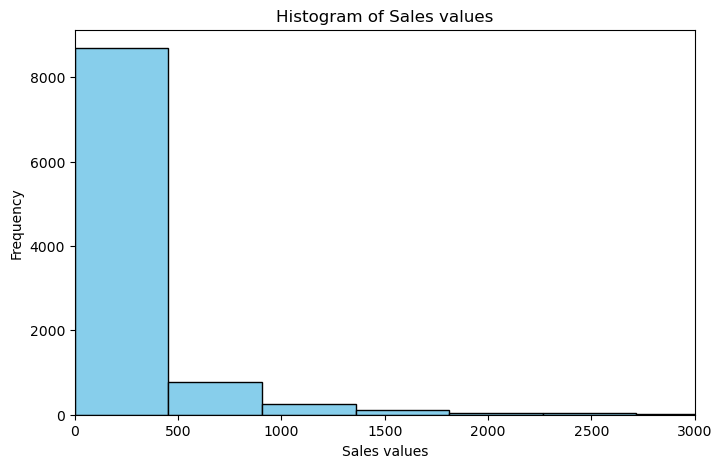

In [173]:
plt.figure(figsize = (8,5))
plt.hist(df['Sales'], bins = 50, color = 'skyblue', edgecolor = 'black')
plt.xlim(0,3000)
plt.title("Histogram of Sales values")
plt.xlabel("Sales values")
plt.ylabel("Frequency")
plt.show()

## What is the most common range of sales amounts?

In [175]:
counts, bin_edges = np.histogram(df['Sales'], bins = 50)
print('Counts:', counts)
print('bin_edges:', bin_edges)

Counts: [8690  774  245  121   46   37   26   10    6   12    8    3    1    0
    1    1    0    1    3    1    2    1    0    1    1    0    0    0
    0    0    1    0    0    0    0    0    0    0    1    0    0    0
    0    0    0    0    0    0    0    1]
bin_edges: [4.44000000e-01 4.53204720e+02 9.05965440e+02 1.35872616e+03
 1.81148688e+03 2.26424760e+03 2.71700832e+03 3.16976904e+03
 3.62252976e+03 4.07529048e+03 4.52805120e+03 4.98081192e+03
 5.43357264e+03 5.88633336e+03 6.33909408e+03 6.79185480e+03
 7.24461552e+03 7.69737624e+03 8.15013696e+03 8.60289768e+03
 9.05565840e+03 9.50841912e+03 9.96117984e+03 1.04139406e+04
 1.08667013e+04 1.13194620e+04 1.17722227e+04 1.22249834e+04
 1.26777442e+04 1.31305049e+04 1.35832656e+04 1.40360263e+04
 1.44887870e+04 1.49415478e+04 1.53943085e+04 1.58470692e+04
 1.62998299e+04 1.67525906e+04 1.72053514e+04 1.76581121e+04
 1.81108728e+04 1.85636335e+04 1.90163942e+04 1.94691550e+04
 1.99219157e+04 2.03746764e+04 2.08274371e+04 2.1280197

In [179]:
max_bin_index = np.argmax(counts)
max_bin_index

0

In [183]:
most_common_range = (bin_edges[max_bin_index], bin_edges[max_bin_index+1])
most_common_range

(0.444, 453.20472)